In [48]:
#import the required modules also provided in reuirements.txt
import pandas as pd
import json
import matplotlib.pyplot as plt

# LOADING AND READING THE DATA

In [10]:
# reading the json data
f = open(r"C:\Users\Shivam Sundram\OneDrive\Documents\data.json",)
data = json.load(f)
  
# Iterating through the json
# we see each element is a dictionary
# from which we will extract the data 
# in the next cell

for i in data["swaps"]:
    print(i)
    print()


{'amount0In': '34.400437477326682886', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '0.3169844529710196', 'amountUSD': '1274.546622074047397671836029450086', 'id': '0x870ec1286bb8b3ef38a99c93fc7ead75ae59cbde9450a9f9f25635aa83f6fb85-0', 'pair': {'id': '0xd3d2e2692501a5c9ca623199d38826e513033a17', 'reserveETH': '60126.998461323065172178', 'token0': {'id': '0x1f9840a85d5af5bf1d1762f925bdaddc4201f984', 'symbol': 'UNI'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol': 'WETH'}, 'totalSupply': '153175.05141185001524167', 'volumeUSD': '6036321461.271395648332232091775348'}, 'timestamp': '1620685831'}

{'amount0In': '1837.193463368265738921', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '16.938651219163264937', 'amountUSD': '68074.20209701330095345112652228984', 'id': '0x1bd2571a152a87704031cd654df7c767be769fde716b5df618280012febc0eba-0', 'pair': {'id': '0xd3d2e2692501a5c9ca623199d38826e513033a17', 'reserveETH': '60126.998461323065172178', 'token0': {'id': '

# EXTRACTING THE REQUIRED DATA IN ARRAYS 

In [61]:
# we first specify the arrays we want
# as a column in our dataframe 
# then iterate over data and append
# the respective values in array



# defining the required array
Timestamp=[]
Status=[]
Base_currency_quantity_traded=[]
Quote_currency_quantity_traded=[]
Volume_in_USD=[]
Liquidity_in_pool=[]
Pool_ID=[]



# iterating the data and appending to array
for i in data["swaps"]:
    if(i["amount0In"]=='0'):
        Status.append("Sell")
        Base_currency_quantity_traded.append(float(i["amount0Out"]))
        Quote_currency_quantity_traded.append(float(i["amount1In"]))
    else:
        Status.append("Buy")
        Base_currency_quantity_traded.append(float(i["amount0In"]))
        Quote_currency_quantity_traded.append(float(i["amount1Out"]))
        
    Timestamp.append(i["timestamp"])
    
    Volume_in_USD.append(float(i['pair']["volumeUSD"]))
    
    Pool_ID.append(i["pair"]["id"])
    
    Liquidity_in_pool.append(float(i["pair"]["reserveETH"]))
    
    
    

        
        
    

# CREATING THE DATAFRAMES FROM THE GENERATED ARRAYS

In [62]:
# now using the pandas module imported
# in 1st shell we will create the desired dataframe

#creating a dataframe called df
df=pd.DataFrame({"Timestamp":Timestamp,"Status":Status,"Base_currency_quantity_traded":Base_currency_quantity_traded,"Quote_currency_quantity_traded":Quote_currency_quantity_traded,"Volume_in_USD":Volume_in_USD,"Liquidity_in_pool":Liquidity_in_pool,"Pool_ID":Pool_ID})

df.head(25) # printing the first 25 rows of the data

,Timestamp,Status,Base_currency_quantity_traded,Quote_currency_quantity_traded,Volume_in_USD,Liquidity_in_pool,Pool_ID
0,1620685831,Buy,34.400437,0.316984,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
1,1620685488,Buy,1837.193463,16.938651,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
2,1620685430,Sell,70.418530,0.653515,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
3,1620685390,Sell,24.554993,0.227875,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
4,1620685384,Sell,200.000000,1.855903,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
5,1620685384,Sell,2.693938,0.025000,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
6,1620684648,Sell,295.915745,2.745535,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
7,1620684539,Buy,17.132878,0.157995,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
8,1620684249,Sell,1067.353926,9.898958,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17
9,1620684155,Buy,3886.538464,35.860060,6.036321e+09,60126.998461,0xd3d2e2692501a5c9ca623199d38826e513033a17


# ANALYSIS OF THE DATA 


In [74]:
%matplotlib inline
a=df.groupby("Status").Base_currency_quantity_traded.mean()
print("For buy and sell cases the mean of Base_currency_quantity_traded changes is observed as:")
a

For buy and sell cases the mean of Base_currency_quantity_traded changes is observed as:


Status
Buy     2466.974509
Sell    2384.912534
Name: Base_currency_quantity_traded, dtype: float64

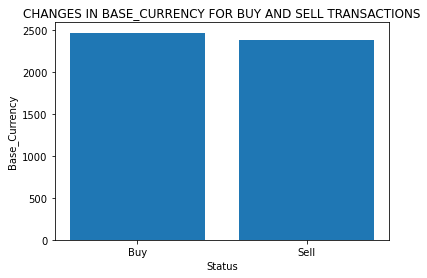

In [72]:
x=["Buy","Sell"]
y=[a[0],a[1]]
plt.bar(x,y)
plt.xlabel("Status")
plt.ylabel("Base_Currency")
plt.title("CHANGES IN BASE_CURRENCY FOR BUY AND SELL TRANSACTIONS")
plt.show()

In [75]:
b=df.groupby("Status").Quote_currency_quantity_traded.mean()
print("for buy and sell cases the mean of QUote_currency_quantity_traded changes is observed as:")
b

for buy and sell cases the mean of QUote_currency_quantity_traded changes is observed as:


Status
Buy     22.659858
Sell    21.910438
Name: Quote_currency_quantity_traded, dtype: float64

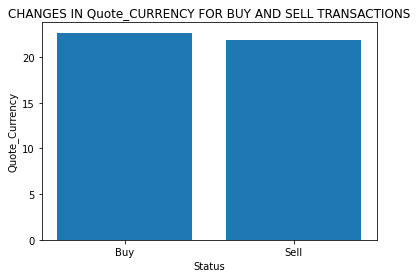

In [76]:
x=["Buy","Sell"]
y=[b[0],b[1]]
plt.bar(x,y)
plt.xlabel("Status")
plt.ylabel("Quote_Currency")
plt.title("CHANGES IN Quote_CURRENCY FOR BUY AND SELL TRANSACTIONS")
plt.show()

In [78]:
a=df.groupby("Status").count()
a

,Timestamp,Base_currency_quantity_traded,Quote_currency_quantity_traded,Volume_in_USD,Liquidity_in_pool,Pool_ID
Status,,,,,,
Buy,84,84,84,84,84,84
Sell,66,66,66,66,66,66


# CONCLUSIONS

### THE AVERAGE FOR QUOTE AND BASE CURRENCIES WERE HIGHER IN CASE FOR BUYING THAN SELLING

### THE VALUES FOR Volume_in_USD and Liquidity_in_pool remain same

###  THE AMOUNT OF BUY ARE GREATER THAN SALES IN TRANSACTION 